In [5]:
import rebound
import reboundx
from celmech import Andoyer
import numpy as np
import sys
import time
%matplotlib inline
import matplotlib.pyplot as plt
import  objgraph
try:
    plt.style.use('paper')
except:
    print("style not found")

In [6]:
filename = 'binaries/damprk4'
sa = reboundx.SimulationArchive(filename+'.sa', rebxfilename = filename+".rebx")

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:86: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/reboundx/reboundx/extras.py:60: RuntimeWarning: REBOUNDx: Binary file was saved with a different version of REBOUNDx. Binary format might have changed. Check that effects and parameters are loaded as expected.
  warnings.warn(message, 

In [7]:
times, E, e1, e2, Pratio = {}, {}, {}, {}, {}
rebxintegrators = ['euler', 'implicit_midpoint', 'rk2', 'rk4']

for rebxintegrator in rebxintegrators:
    filename = 'binaries/damp'+rebxintegrator
    saSP = reboundx.SimulationArchive(filename+'.sa', rebxfilename = filename+".rebx")
    print(filename, 'SP', saSP.nblobs)
    sa = reboundx.SimulationArchive(filename+'IAS.sa', rebxfilename = filename+"IAS.rebx")
    print(filename, 'IAS', sa.nblobs)
    
    simSP, rebxSP = saSP[0]
    h = simSP.dt
    P = simSP.particles[1].P
    
    times[rebxintegrator], times[rebxintegrator+'IAS'] = np.zeros(sa.nblobs), np.zeros(sa.nblobs)
    E[rebxintegrator], E[rebxintegrator+'IAS'] = np.zeros(sa.nblobs), np.zeros(sa.nblobs)
    e1[rebxintegrator], e1[rebxintegrator+'IAS'] = np.zeros(sa.nblobs), np.zeros(sa.nblobs)
    e2[rebxintegrator], e2[rebxintegrator+'IAS'] = np.zeros(sa.nblobs), np.zeros(sa.nblobs)
    Pratio[rebxintegrator], Pratio[rebxintegrator+'IAS'] = np.zeros(sa.nblobs), np.zeros(sa.nblobs)
    
    for i, (sim, rebx) in enumerate(sa):
        times[rebxintegrator+'IAS'][i] = sim.t/P
        E[rebxintegrator+'IAS'][i] = sim.calculate_energy()
        e1[rebxintegrator+'IAS'][i] = sim.particles[1].e
        e2[rebxintegrator+'IAS'][i] = sim.particles[2].e
        Pratio[rebxintegrator+'IAS'][i] = sim.particles[2].P/sim.particles[1].P
        
    for i, (sim, rebx) in enumerate(saSP):
        times[rebxintegrator][i] = sim.t/P
        E[rebxintegrator][i] = sim.calculate_energy()
        e1[rebxintegrator][i] = sim.particles[1].e
        e2[rebxintegrator+'IAS'][i] = sim.particles[2].e
        Pratio[rebxintegrator][i] = sim.particles[2].P/sim.particles[1].P

binaries/dampeuler SP 1001
binaries/dampeuler IAS 1001
binaries/dampimplicit_midpoint SP 1001
binaries/dampimplicit_midpoint IAS 1001
binaries/damprk2 SP 1001
binaries/damprk2 IAS 1001
binaries/damprk4 SP 1001
binaries/damprk4 IAS 1001


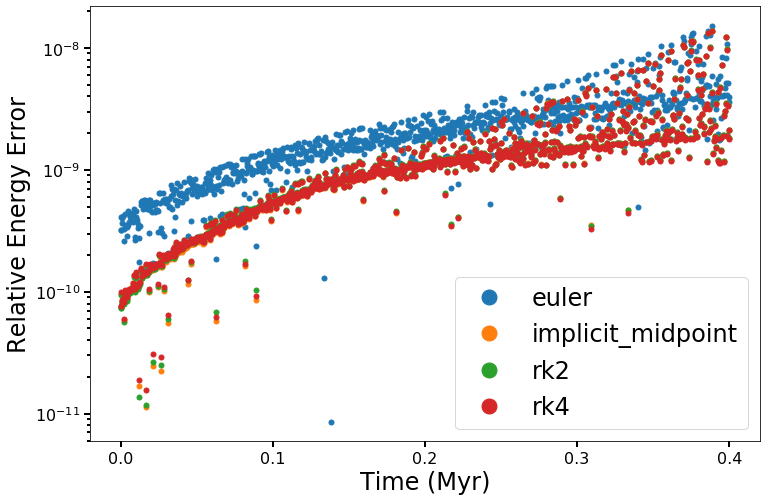

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
for rebxintegrator in rebxintegrators:
    ax.plot(times[rebxintegrator+'IAS']/1e6, (E[rebxintegrator]-E[rebxintegrator+'IAS'])/E[rebxintegrator+'IAS'], '.',  label=rebxintegrator)
ax.set_yscale('log')
ax.set_xlabel('Time (Myr)', fontsize=24)
ax.set_ylabel('Relative Energy Error', fontsize=24)
ax.locator_params(axis='x', nbins=5)
ax.legend(fontsize=24, loc='lower right', markerscale=3)
plt.rcParams["text.usetex"] = False
plt.locator_params(axis='y', numticks=5)

fig.savefig('fig6.pdf', bbox_inches='tight')